# Analysis of Sample Data

In [1]:
from collections import Counter

from matplotlib import (mlab, pyplot as plt)
import numpy as np
import pandas as pd
import nltk as nl
from wordcloud import WordCloud

from sentiment_analysis import (database as db, entities as et, util)

In [2]:
df = pd.read_sql_table('game_review', db.engine)
df.head()

,id,user_id,game_id,rating,comment,comment_lower
0,1,25308,37111,8.5,++++ Thematic +++ Bluff - Many randomness I ...,++++ thematic +++ bluff - many randomness i ...
1,2,54313,12,8.0,"""well, that ugly artwork certainly helped imme...","""well, that ugly artwork certainly helped imme..."
2,3,38165,50,8.0,LOVE this game! If only the GF would play it ...,love this game! if only the gf would play it ...
3,4,56936,1198,5.0,"SET is a good game, in small doses (in my case...","set is a good game, in small doses (in my case..."
4,5,47675,164153,6.0,"So much better than Descent. Better theme, imp...","so much better than descent. better theme, imp..."


# Rating Column Analysis

Comment length median:  7.5
Comment length median:  7.251676505312869


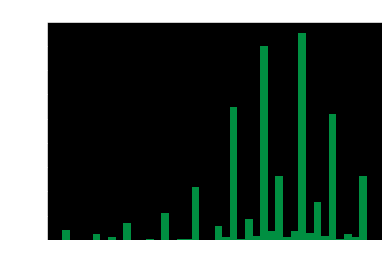

In [15]:
num_bins = 40

plt.hist(df.rating, num_bins, facecolor=util.green)

plt.title('Rating distribution')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')

print('Comment length median: ', df.rating.median())
print('Comment length median: ', df.rating.mean())


plt.show()

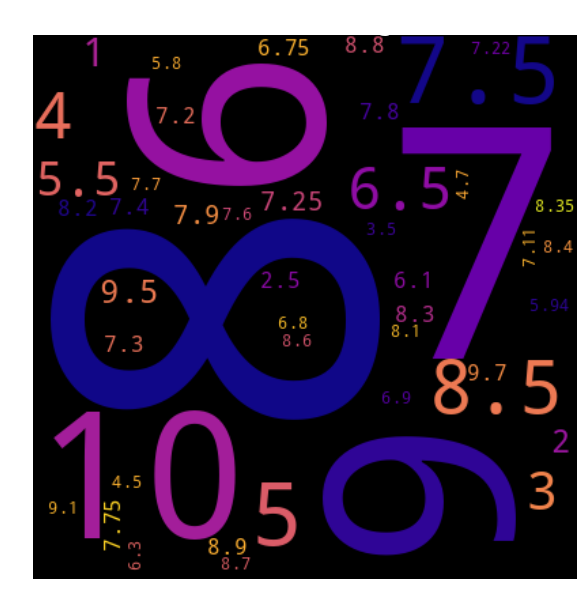

In [4]:
wc = WordCloud(width=400, height=400,colormap='plasma').generate_from_frequencies(
    dict(
        Counter([ str(int(v) if v.is_integer() else v) for v in df.rating.tolist() ])
    )
)
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation='bilinear')
plt.title('Game Ratings', fontsize=30)
plt.axis('off');

# Comment Column Analysis

Significant word count: 3943


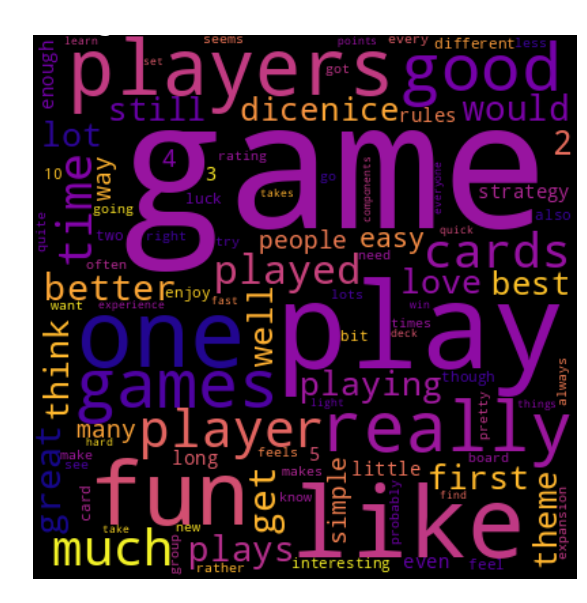

In [5]:
sw = set(nl.corpus.stopwords.words('english'))

words = Counter([w for w in nl.RegexpTokenizer(r'\w+').tokenize(df.comment.str.cat(sep=' ').lower()) if w not in sw])

print('Significant word count: %d' % len(words))

wc = WordCloud(width=400, height=400,colormap='plasma').generate_from_frequencies(dict(words.most_common(100)))
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation='bilinear')
plt.title('Significant Words in Comments', fontsize=30)
plt.axis('off');

In [6]:
wdf = pd.read_sql_table('sig_word', db.engine)
wdf.head()

,id,word,count,game_count,median,median_q25,median_q50,median_q75,mode,mean,stdev,pstdev,variance,pvariance
0,1,underneath,1,1,8.2,8.20,8.2,8.20,8.2,8.200,NaN,0.00000,NaN,0.00000
1,2,planning,15,13,8.2,7.00,8.2,9.00,9.0,7.627,1.77260,1.71249,3.14210,2.93262
2,3,chaos,8,8,8.0,6.75,8.0,8.25,8.0,7.250,1.98206,1.85405,3.92857,3.43750
3,4,simultaneous,2,2,6.0,5.50,6.0,6.50,NaN,6.000,1.41421,1.00000,2.00000,1.00000
4,5,evolution,1,1,6.0,6.00,6.0,6.00,6.0,6.000,NaN,0.00000,NaN,0.00000


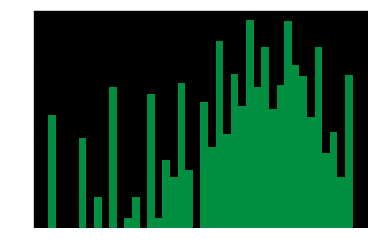

In [7]:
num_bins = 40

_, ax = plt.subplots()
ax.set_yscale('log')
plt.hist(wdf.median_q50, num_bins, facecolor=util.green)
plt.show()

In [8]:
oh = et.SigWordUse.onehot()
oh.iloc[:,1:]

,user_id,_rating,aaahhh,aarg,abbey,abilities,ability,able,aboms,about,...,youre,yourself,yr,yspahan,yup,zertz,zman,zombie,zombies,zooleretto
0,24732,7.00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,27836,9.00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,69476,6.00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,100693,6.00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,130258,7.00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,27003,6.00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,154001,7.50,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,192801,8.00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,52258,7.20,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9,181797,6.00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Comment length mean:  227.81582054309328
Comment length min:   6
Comment length max:   7977


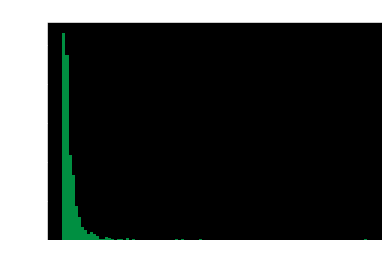

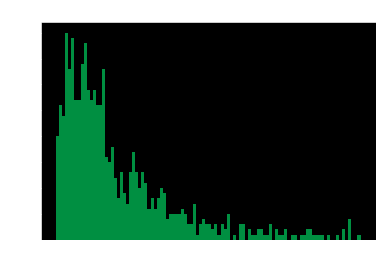

In [9]:
len_df = df.comment.str.len()

print('Comment length mean: ', len_df.mean())
print('Comment length min:  ', len_df.min())
print('Comment length max:  ', len_df.max())

num_bins = 100

plt.hist(len_df, num_bins, facecolor=util.green)

plt.title('Comment length')
plt.xlabel('Length of comment')
plt.ylabel('Number of Reviews')
plt.show()

upper_comment_bound = np.percentile(len_df, [0, 97.5])[1]

plt.hist(len_df[len_df < upper_comment_bound].dropna(), num_bins, facecolor=util.green)

plt.title('Comment length (97.5 percentile)')
plt.xlabel('Length of comment')
plt.ylabel('Number of Reviews')
plt.show()

# GameID Column Analysis

Review count mean:  2.630434782608696
Review count min:   1
Review count max:   16


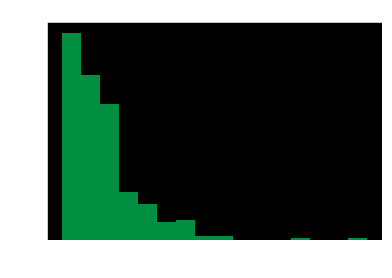

In [10]:
gameID_df = pd.DataFrame({'review_count': list(Counter(df.game_id).values()) })

print('Review count mean: ', gameID_df.review_count.mean())
print('Review count min:  ', gameID_df.review_count.min())
print('Review count max:  ', gameID_df.review_count.max())

plt.hist(gameID_df.review_count, gameID_df.review_count.max(), facecolor=util.green)
plt.title('Review count per game')
plt.xlabel('Review count')
plt.ylabel('Number of games')
plt.show()

# UserID Column Analysis

Review count mean:  1.0204819277108435
Review count min:   1
Review count max:   2


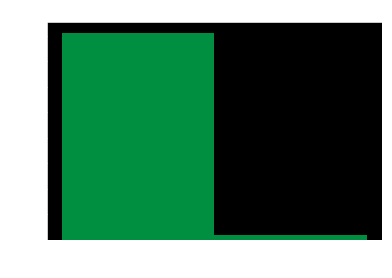

In [11]:
userID_df = pd.DataFrame({'review_count': list(Counter(df.user_id).values())})

print('Review count mean: ', userID_df.review_count.mean())
print('Review count min:  ', userID_df.review_count.min())
print('Review count max:  ', userID_df.review_count.max())

plt.hist(userID_df.review_count, userID_df.review_count.max(), facecolor=util.green)
plt.title('Number of user Reviews')
plt.xlabel('Number of users')
plt.xticks(range(userID_df.review_count.min(), userID_df.review_count.max() + 1))
plt.ylabel('Review count')
plt.show()

# Comment x Rating Analysis

In [12]:
num_bins = 40


d = pd.cut(df.rating, 20)
